<a href="https://colab.research.google.com/github/kcanmersin/Google-Colab-Notebooks/blob/main/air_passenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams

In [75]:
data= pd.read_csv("/content/AirPassengers.csv")

In [76]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [77]:
data['Month'] = pd.to_datetime(data.Month)
data = data.set_index(data.Month)
data.drop('Month', axis = 1, inplace = True)

In [78]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [79]:
ts = data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

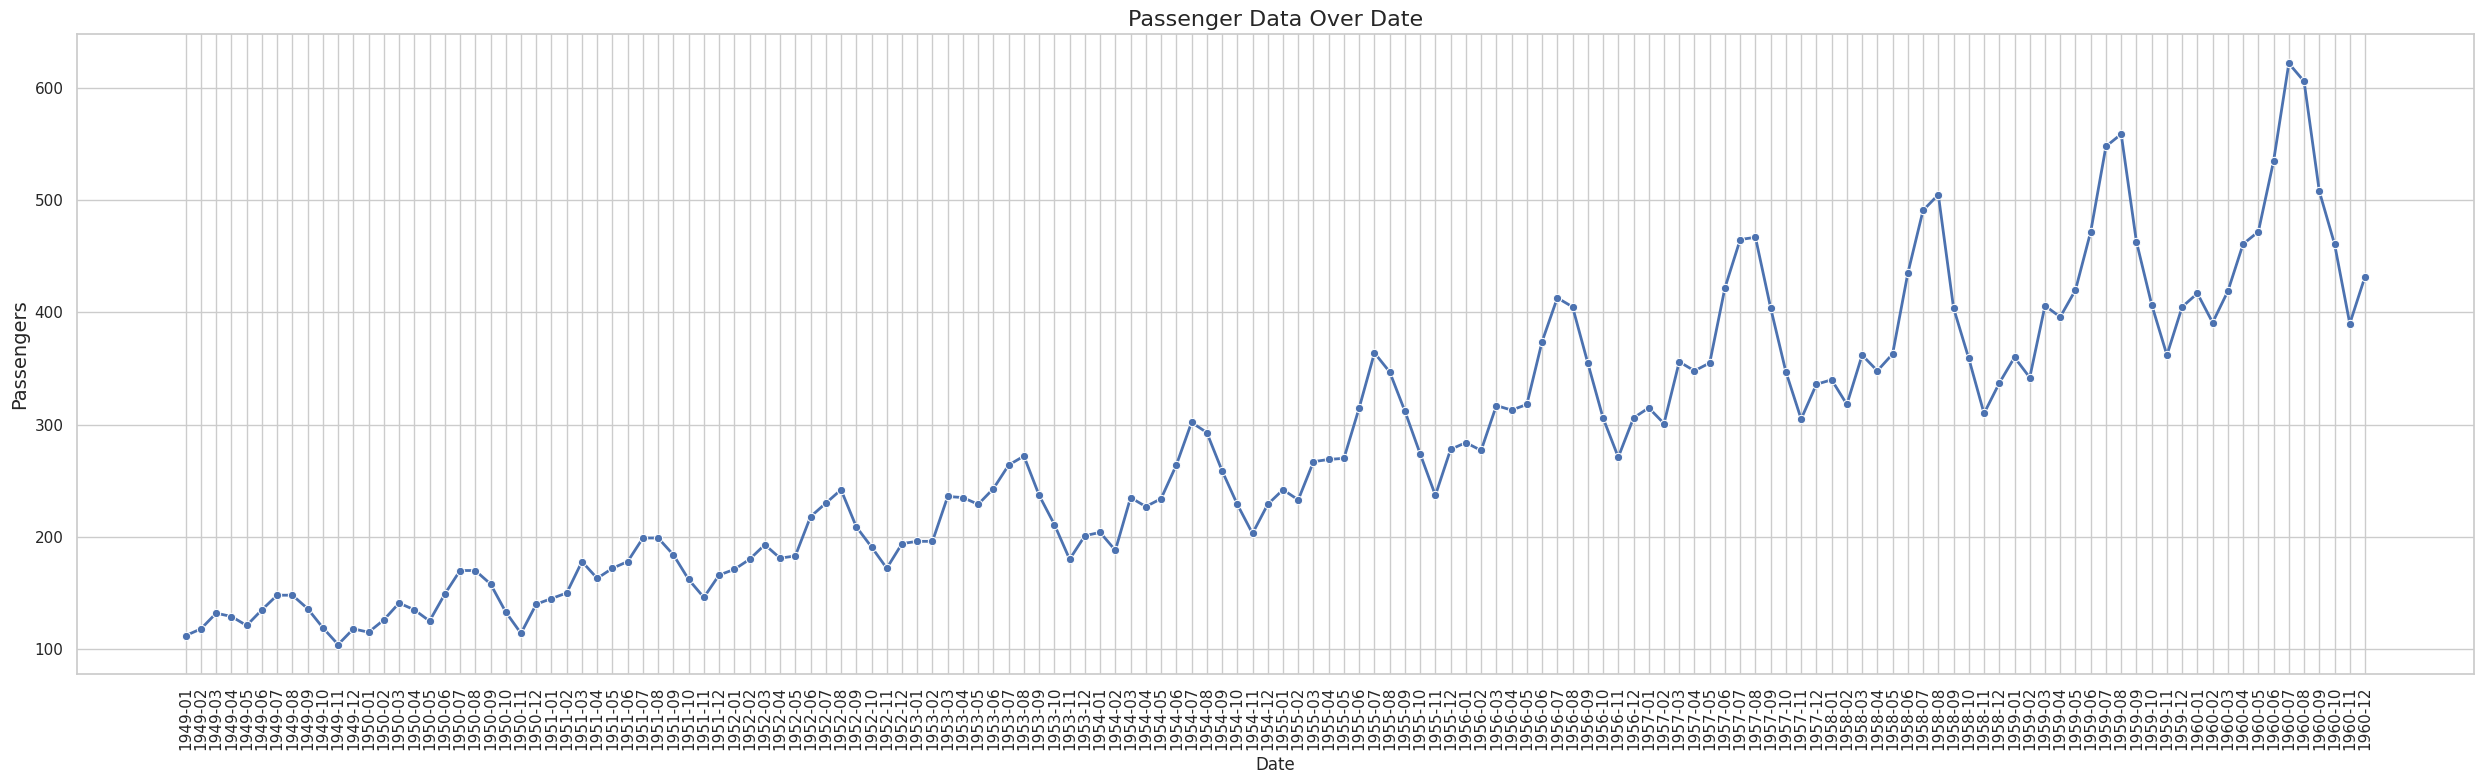

In [80]:
sns.set(style="whitegrid")

plt.figure(figsize=(25, 8))
sns.lineplot(data=df, x='Date', y='Passengers', marker='o', color='b', linewidth=2)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Passengers', fontsize=14)
plt.title('Passenger Data Over Date', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

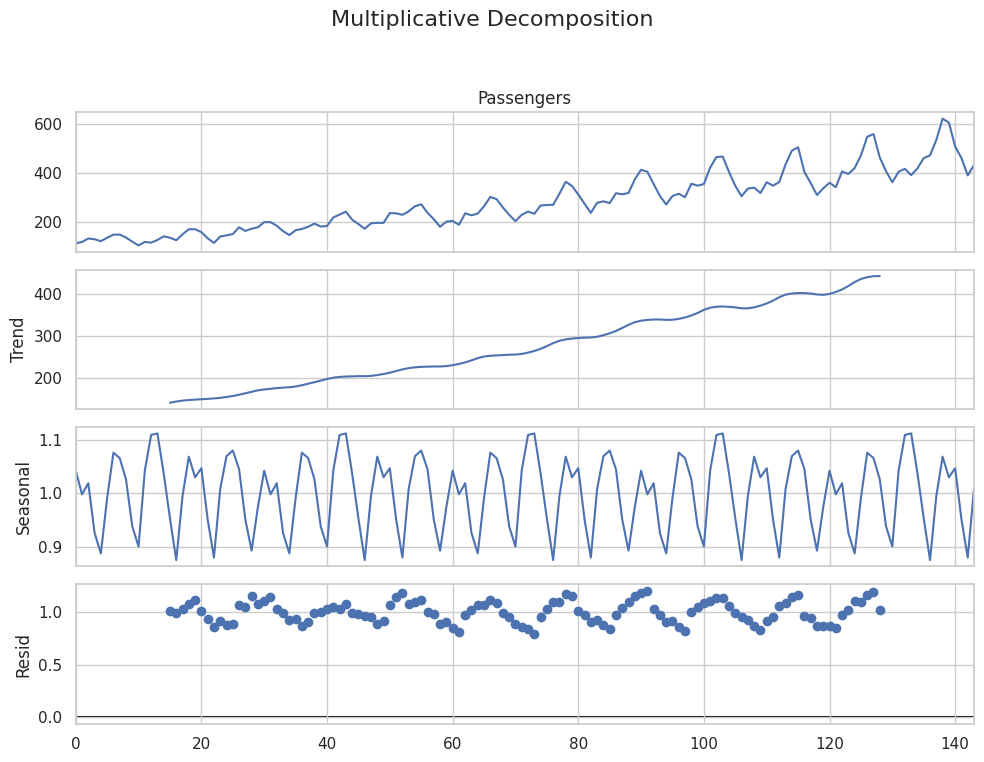

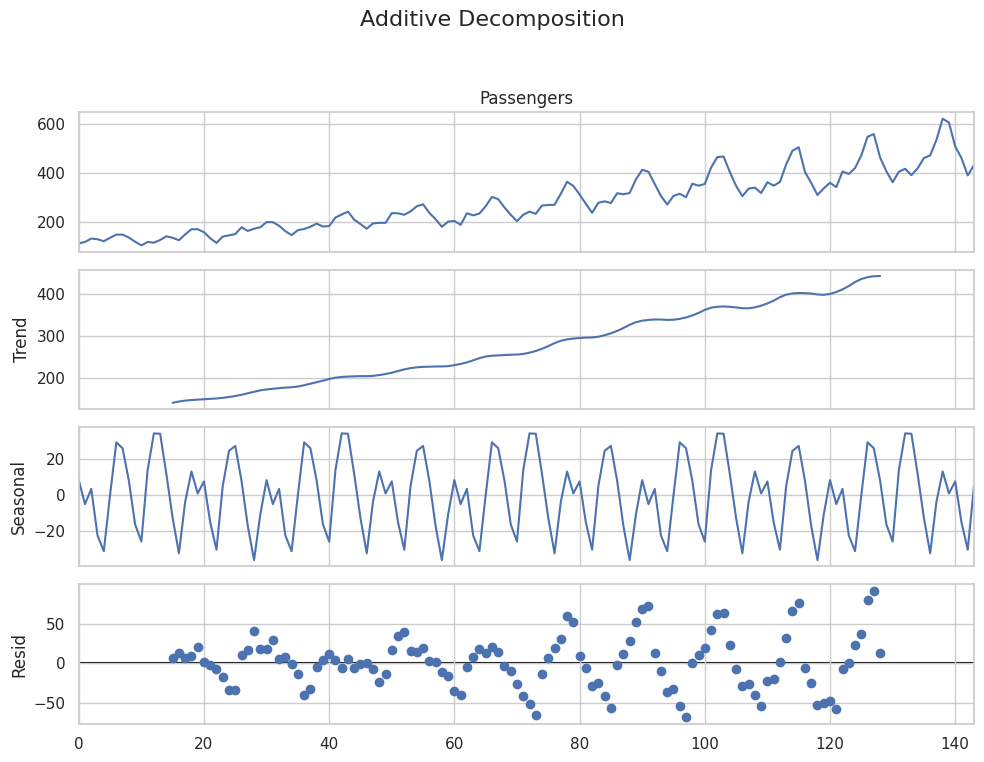

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


multiplicative_decomposition = seasonal_decompose(df['Passengers'], model='multiplicative', period=30)

additive_decomposition = seasonal_decompose(df['Passengers'], model='additive', period=30)


plt.rcParams.update({'figure.figsize': (10,8)})

multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

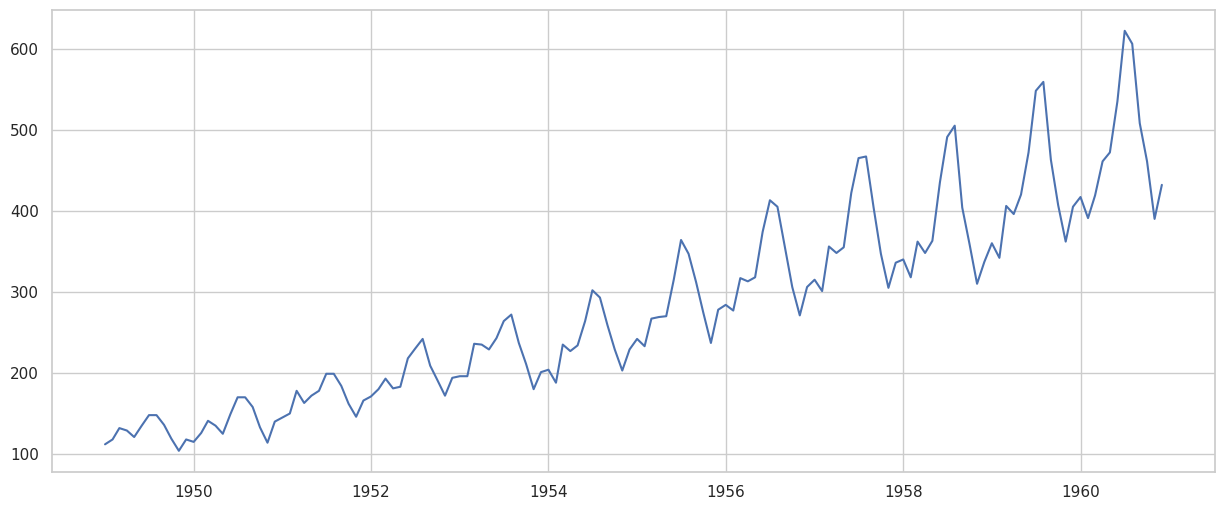

In [82]:
rcParams['figure.figsize'] = 15,6
plt.plot(ts)

<Axes: ylabel='Density'>

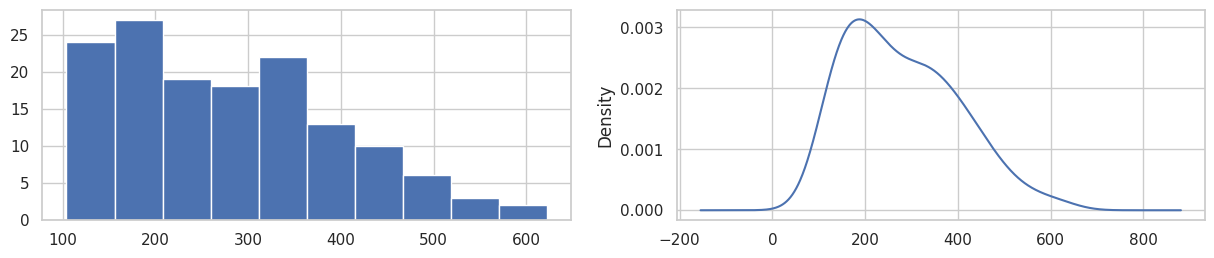

In [83]:
plt.subplot(221)
plt.hist(ts)
plt.subplot(222)
ts.plot(kind = 'kde')

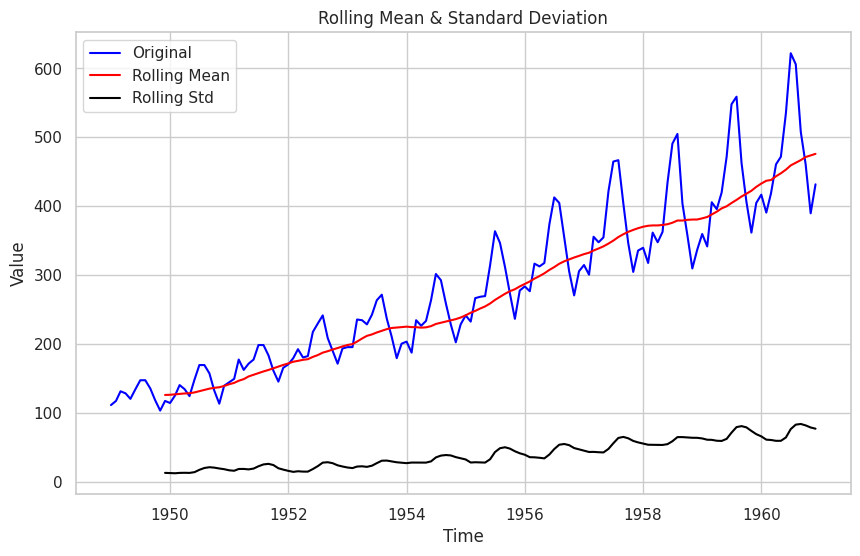

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [84]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Calculate rolling statistics
    rolling_window = 12
    rolmean = timeseries.rolling(window=rolling_window).mean()
    rolstd = timeseries.rolling(window=rolling_window).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value

    print(dfoutput)

test_stationarity(ts)


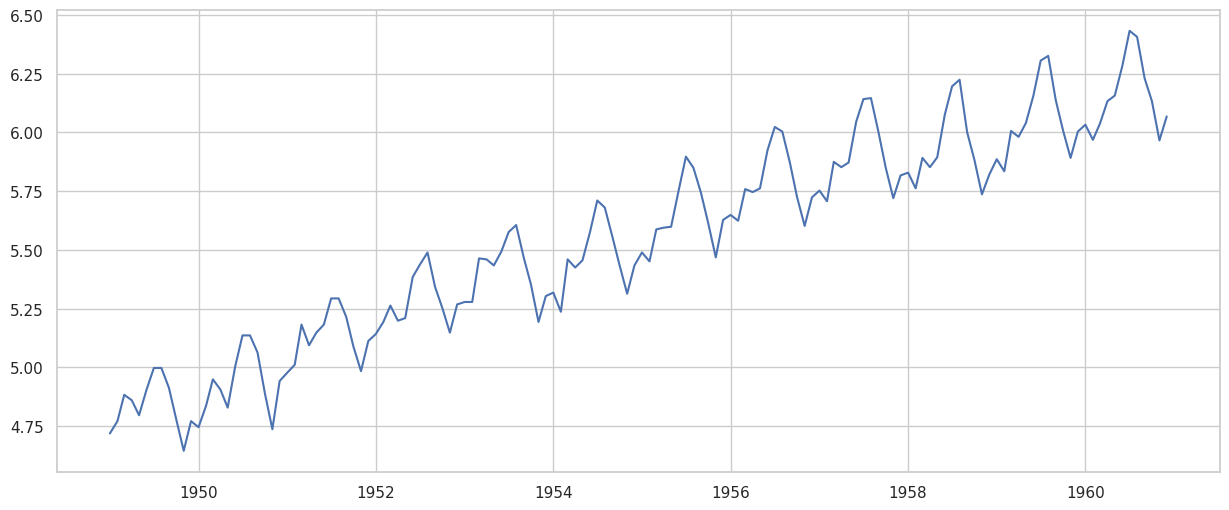

In [85]:
ts_log = np.log(ts)
plt.plot(ts_log)

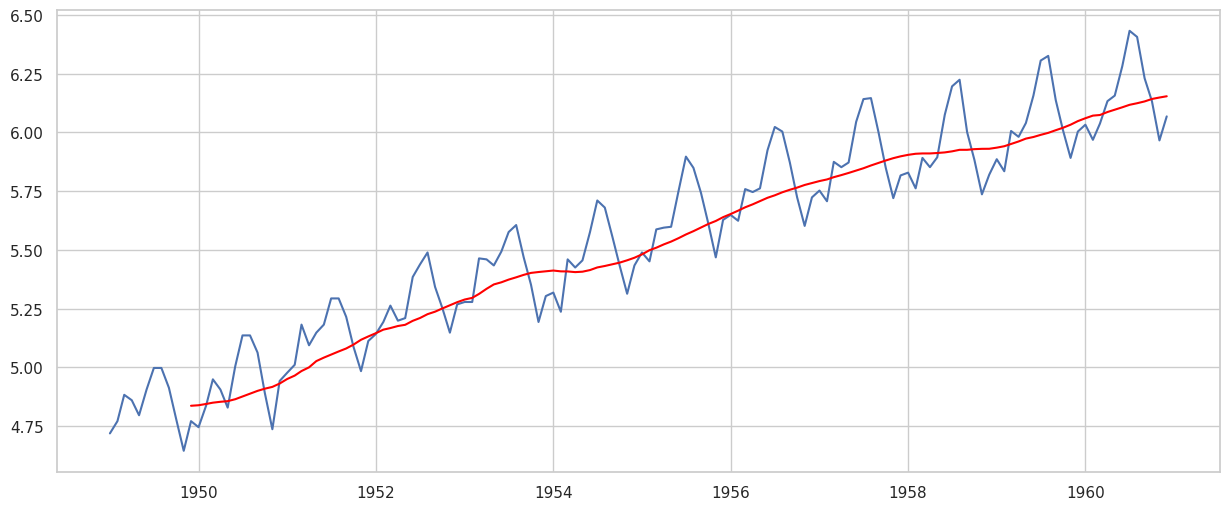

In [86]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color = 'red')

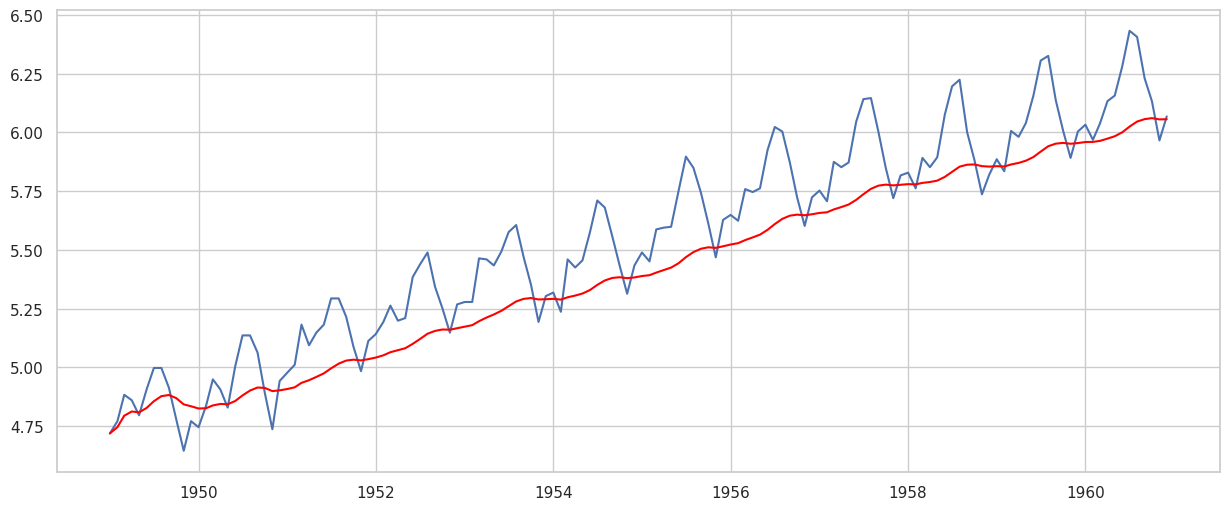

In [87]:
exp_weighted_avg = ts_log.ewm(halflife = 12).mean()
plt.plot(ts_log)
plt.plot(exp_weighted_avg, color = 'red')

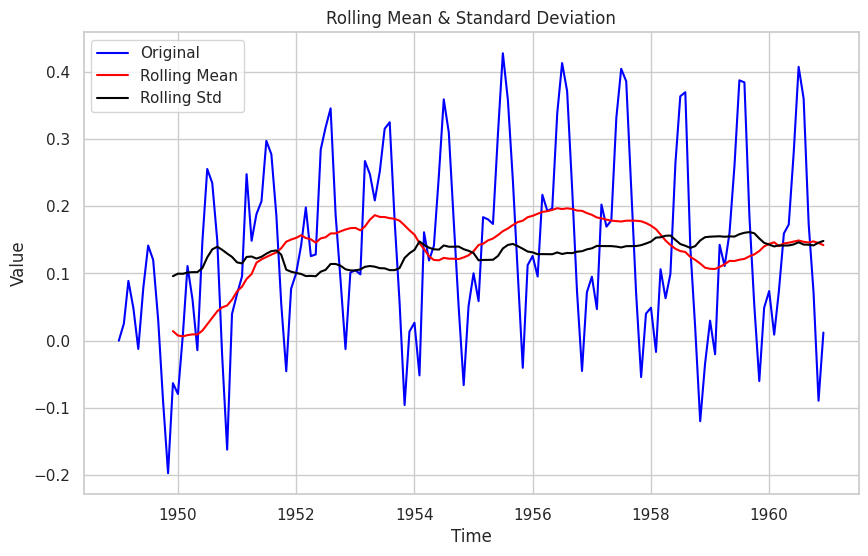

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [88]:
ts_log_ema_diff = ts_log - exp_weighted_avg
test_stationarity(ts_log_ema_diff)

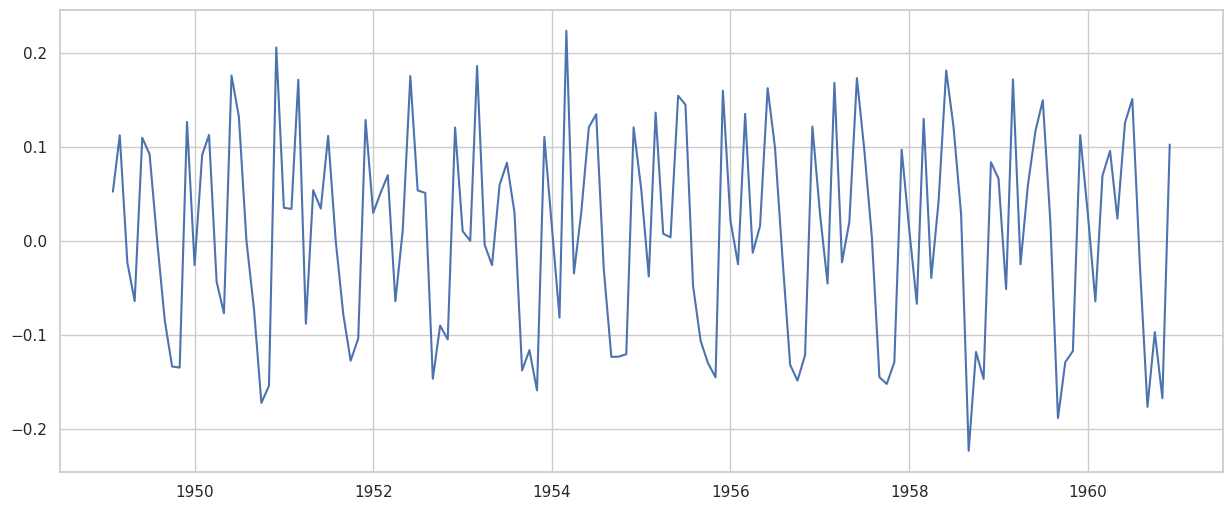

In [89]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

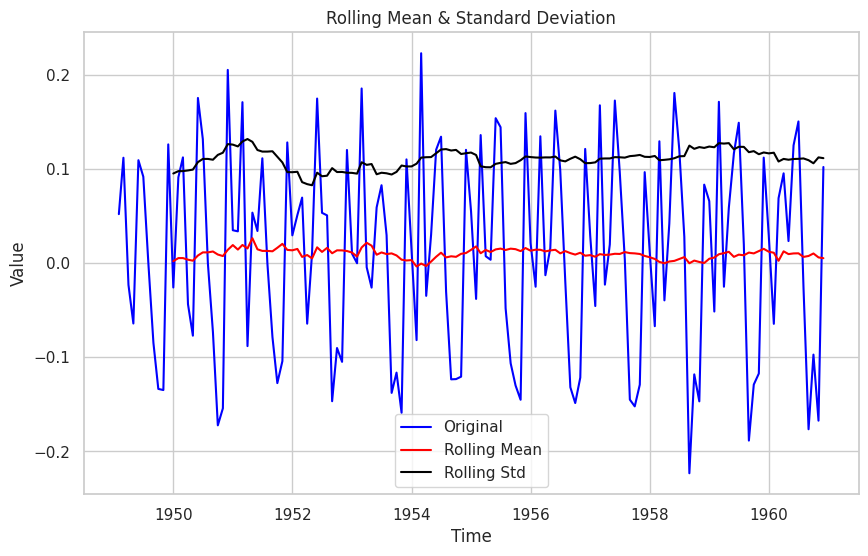

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [90]:
ts_log_diff.dropna(inplace = True)
test_stationarity(ts_log_diff)

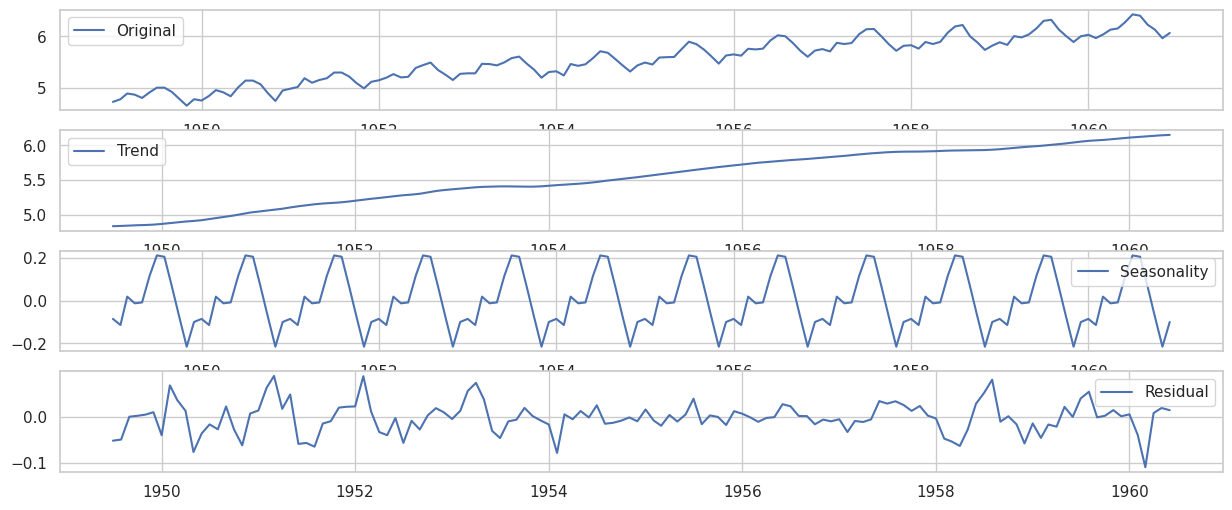

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')

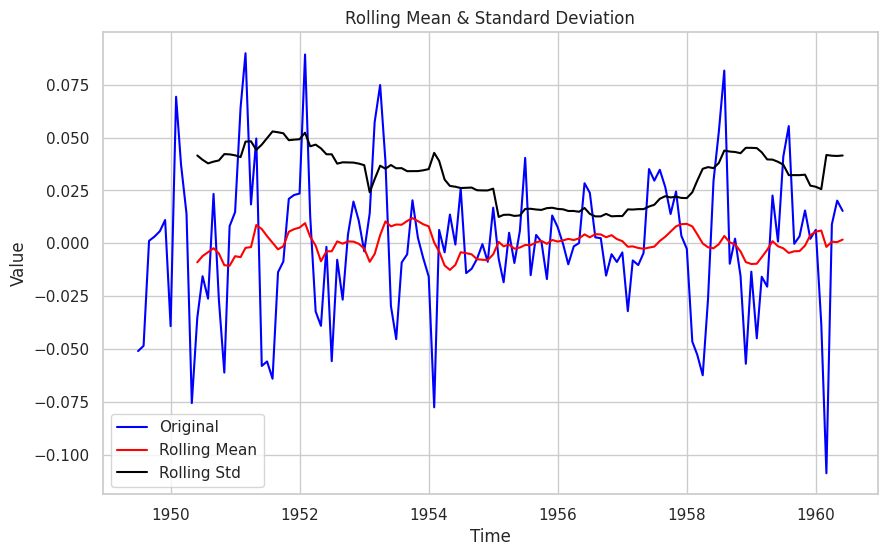

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [92]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace = True)
test_stationarity(ts_log_decompose)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

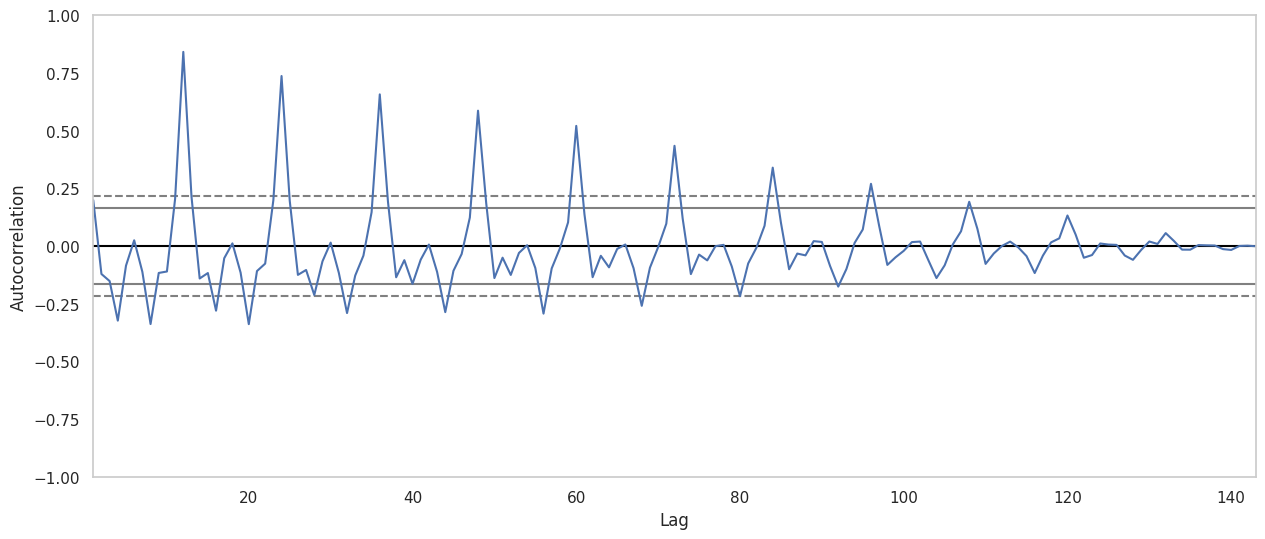

In [93]:
#ACF plot
pd.plotting.autocorrelation_plot(ts_log_diff)

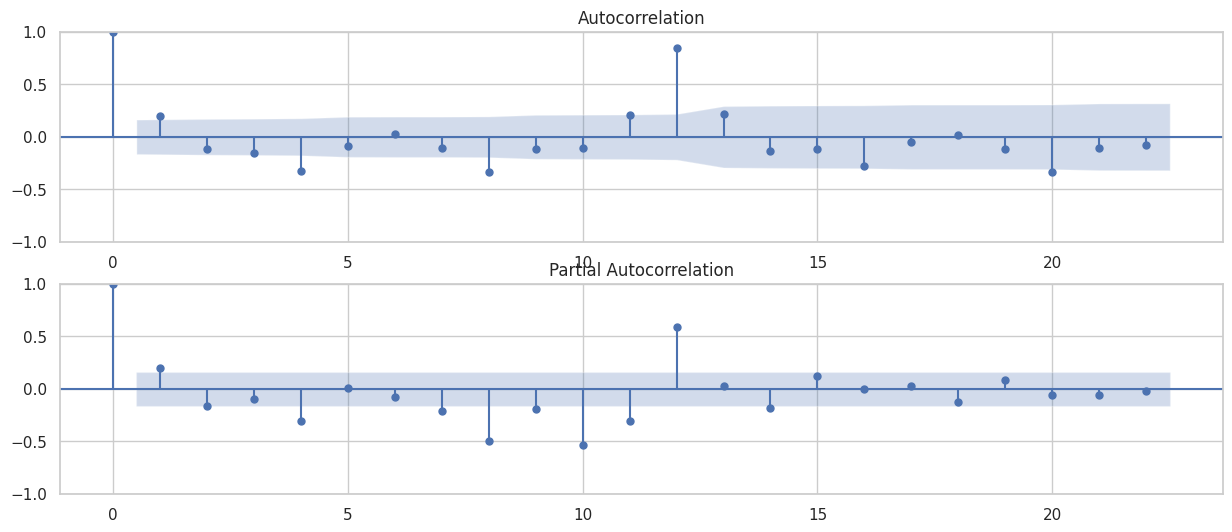

In [94]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.subplot(211)
plot_acf(ts_log_diff, ax=plt.gca())
plt.subplot(212)
plot_pacf(ts_log_diff, ax=plt.gca())
plt.show()

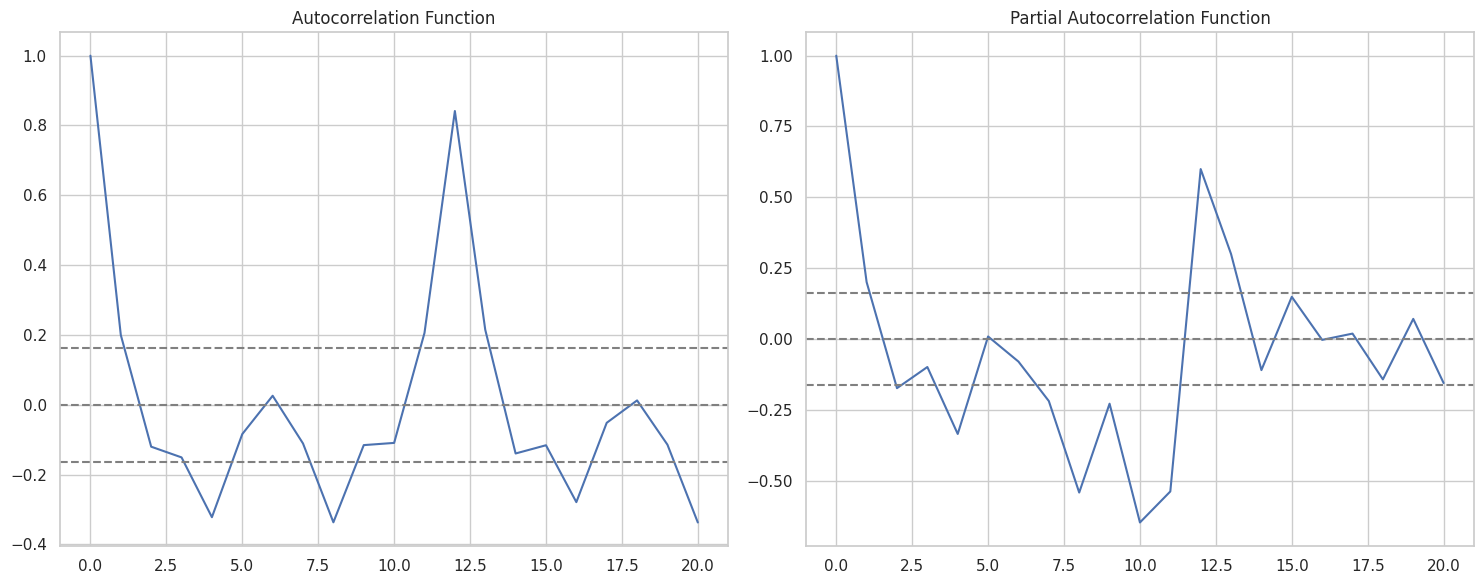

In [95]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray') #Add a horizontal line across the axis at y = 0.
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout() #Automatically adjust subplot parameters to give specified padding.

In [96]:
from statsmodels.tsa.arima_model import ARIMA, ARMAResults

In [97]:
import itertools
p = d = q = range(2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

In [98]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")           #Specify to ignore warning messages
AIC_df = pd.DataFrame({}, columns = ['param', 'param_seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_log, order = param, seasonal_order = param_seasonal, enforce_stationarity = False, enforce_invertibility = False)
            results = mod.fit()
            #print('ARIMA{}x{}-AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[param, param_seasonal, results.aic]], columns = ['param', 'param_seasonal', 'AIC'])
            AIC_df = AIC_df.append(temp, ignore_index = True)
            del temp
        except:
            continue

In [99]:
min_aic = AIC_df.sort_values(by = 'AIC').iloc[0]
model = sm.tsa.statespace.SARIMAX(ts_log, order = min_aic.param, seasonal_order = min_aic.param_seasonal, enforce_stationarity = False, enforce_invertibility = False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9419      0.039     24.103      0.000       0.865       1.018
ma.L1         -0.3804      0.093     -4.093      0.000      -0.562      -0.198
ar.S.L12       1.0200      0.003    302.460      0.000       1.013       1.027
ma.S.L12      -0.5747      0.107     -5.387      0.000      -0.784      -0.366
sigma2         0.0013      0.000      9.241      0.000       0.001       0.002


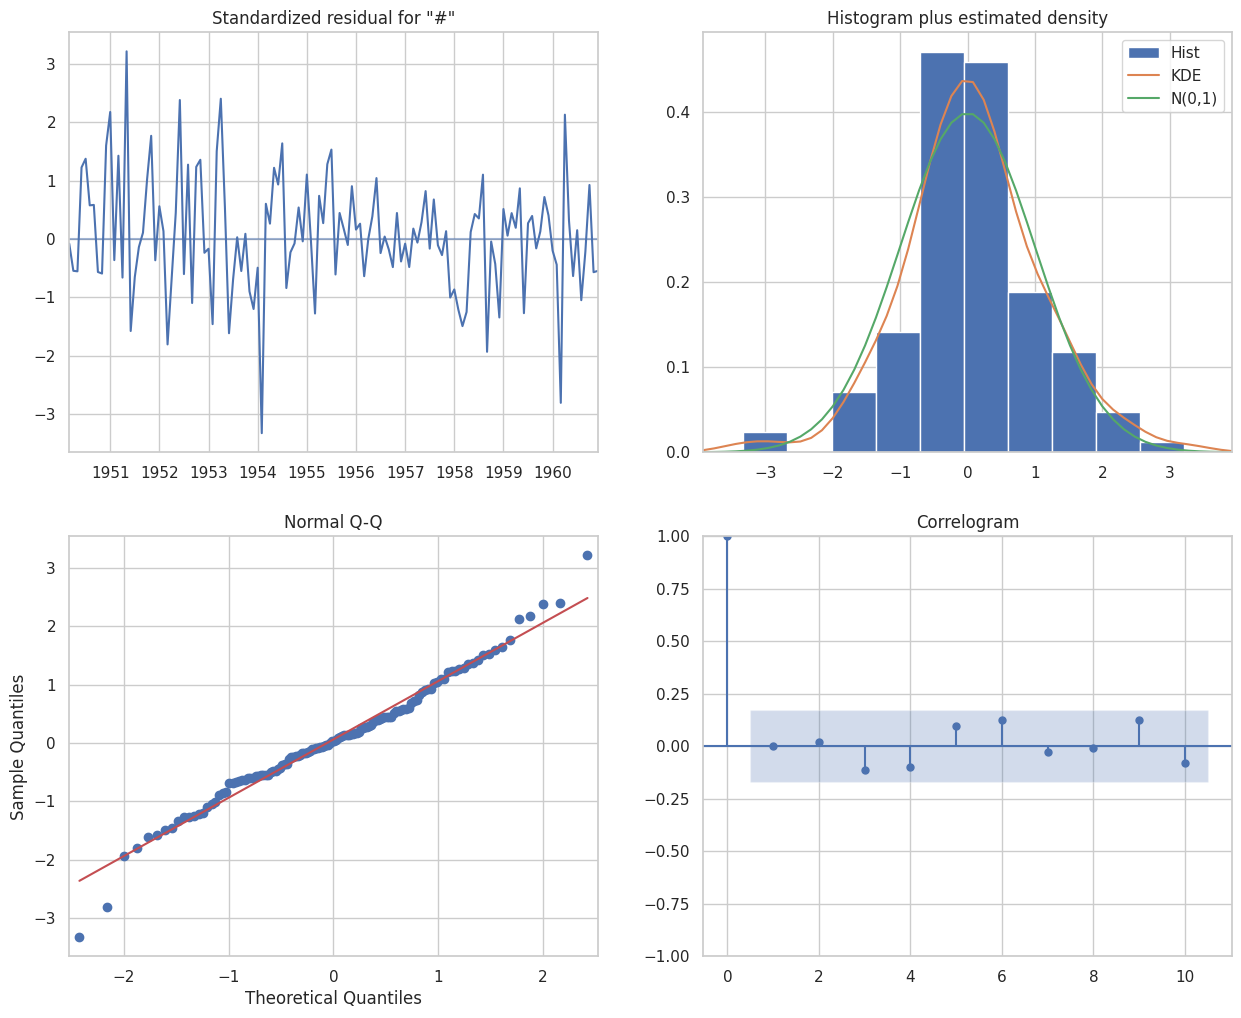

In [100]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [101]:
pred = results.get_prediction(start = pd.to_datetime('1958-01-01'), dynamic = False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower #Passengers,upper #Passengers
1958-01-01,5.789096,5.931723
1958-02-01,5.734892,5.877518
1958-03-01,5.874632,6.017255
1958-04-01,5.826376,5.968999
1958-05-01,5.818795,5.961418


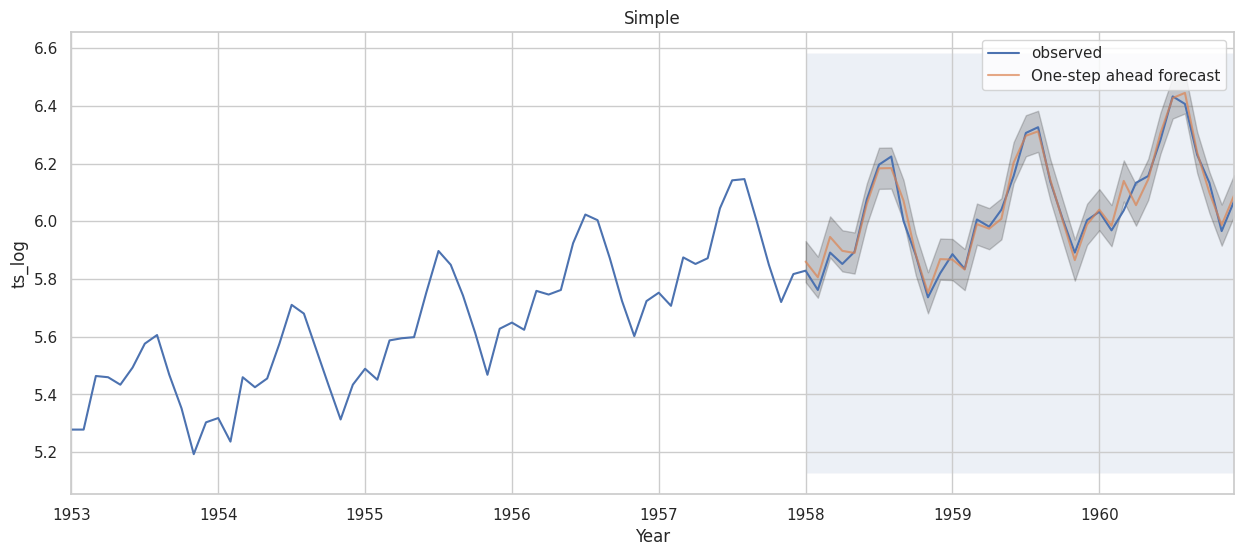

In [102]:
ax = ts_log['1953':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead forecast', alpha = 0.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .2)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), ts_log.index[-1], alpha = .1, zorder = -1)
plt.xlabel('Year')
plt.ylabel('ts_log')
plt.title('Simple')
plt.legend()

In [103]:
pred.predicted_mean.head()

1958-01-01    5.860409
1958-02-01    5.806205
1958-03-01    5.945944
1958-04-01    5.897687
1958-05-01    5.890106
Freq: MS, Name: predicted_mean, dtype: float64

In [104]:
ts_log_forecasted = pred.predicted_mean
ts_log_original = ts_log['1958-01-01':]
mse = ((ts_log_forecasted - ts_log_original) ** 2).mean()
print('Mean Squared Error of forecast : {}'.format(round(mse,3)))

Mean Squared Error of forecast : 0.001


In [105]:
pred_dynamic = results.get_prediction(start = pd.to_datetime('1958-01-01'), dynamic = True, full_results = True)
pred_dynamic_ci = pred_dynamic.conf_int()
pred_dynamic_ci.head()

,lower #Passengers,upper #Passengers
1958-01-01,5.789096,5.931723
1958-02-01,5.742086,5.905662
1958-03-01,5.897315,6.077448
1958-04-01,5.870390,6.064030
1958-05-01,5.878692,6.083571


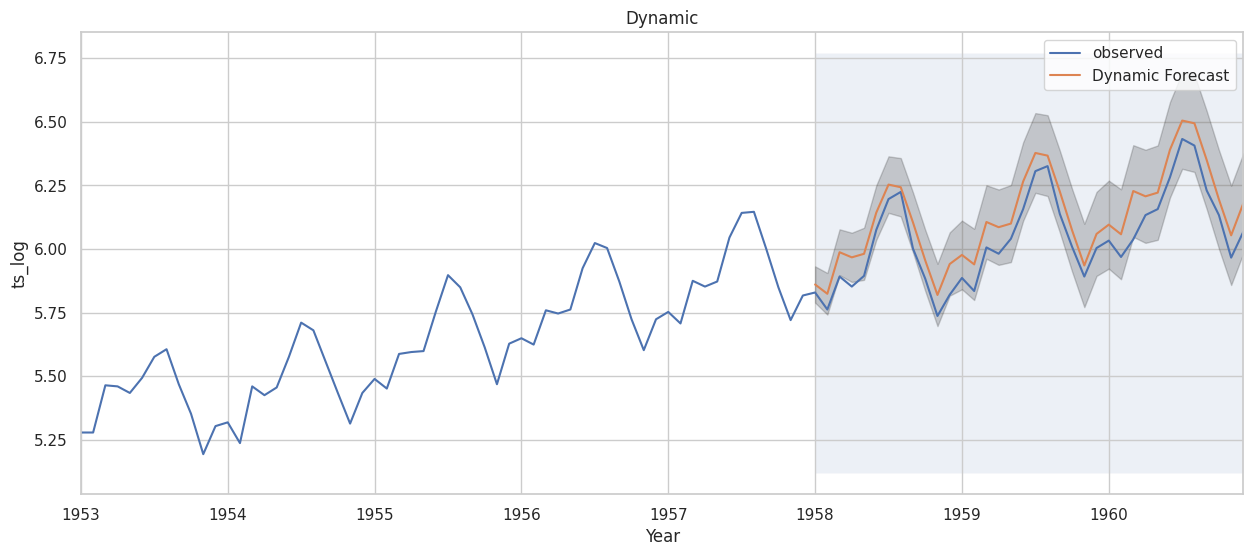

In [106]:
ax = ts_log['1953':].plot(label = 'observed')
pred_dynamic.predicted_mean.plot(ax = ax, label = 'Dynamic Forecast')
ax.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color = 'k', alpha = .2)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), ts_log.index[-1], alpha = .1, zorder = -1)
plt.xlabel('Year')
plt.ylabel('ts_log')
plt.title('Dynamic')
plt.legend()

In [107]:
ts_log_forecasted_dyna = pred_dynamic.predicted_mean
ts_log_truevalue = ts_log['1958-01-01':]
mse = ((ts_log_forecasted_dyna - ts_log_truevalue) ** 2).mean()
print('Mean Squared Error of forecast : {}'.format(round(mse, 3)))

Mean Squared Error of forecast : 0.008


In [108]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
pred_ci.head()

,lower #Passengers,upper #Passengers
1961-01-01,6.045088,6.187709
1961-02-01,5.978743,6.142312
1961-03-01,6.097811,6.277937
1961-04-01,6.119981,6.313615
1961-05-01,6.151028,6.355902


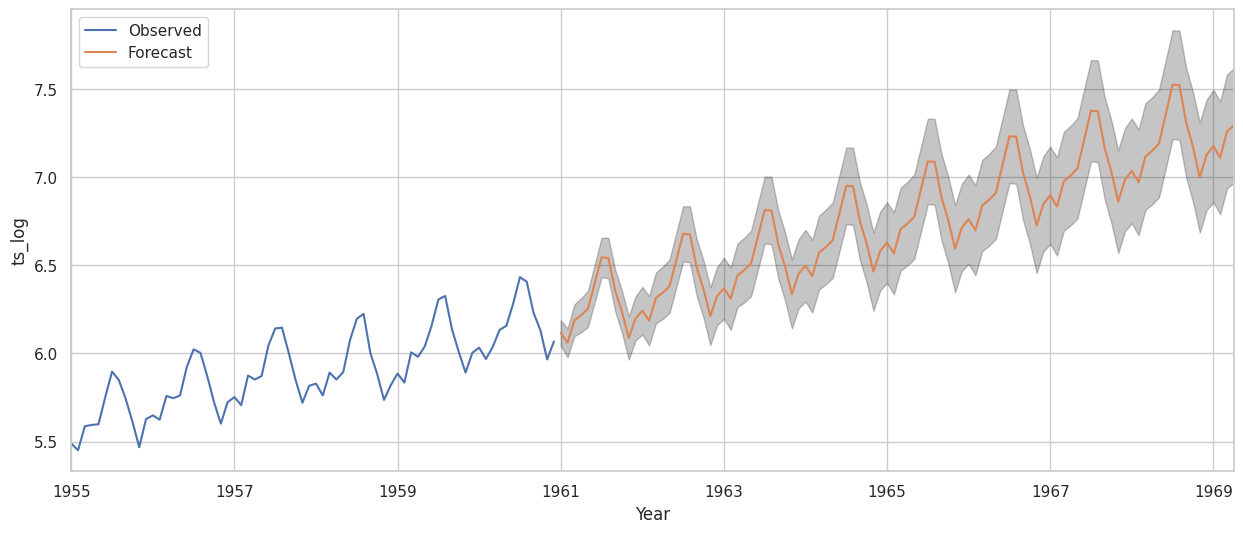

In [109]:
ax = ts_log['1955':].plot(label='Observed')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('ts_log')
plt.legend(loc = 'upper left')
plt.show()

In [110]:
pred_uc = np.exp(pred_uc.predicted_mean)
pred_ci = np.exp(pred_ci)

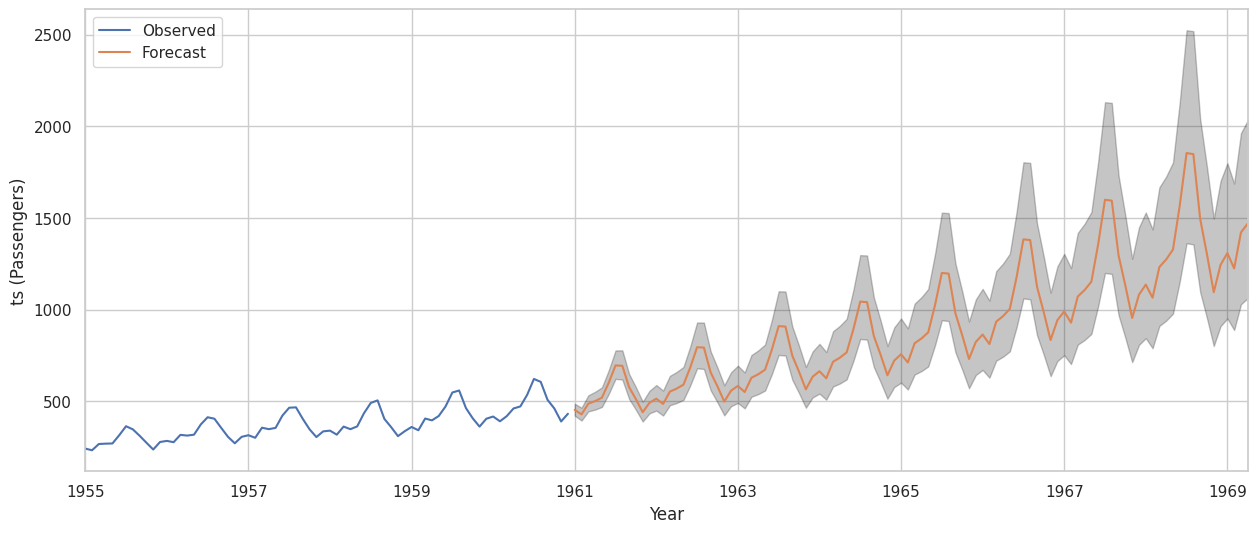

In [111]:
#Plot original data prediction
ax = ts['1955':].plot(label='Observed')
pred_uc.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('ts (Passengers)')
plt.legend(loc = 'upper left')
plt.show()